# EDA ON SPOTIFY TOP SONGS 2009-2019

Who doesn't like music? Surely, we all have different opinions and tastes when it comes to music but all of us would definitely agree on one thing : that the world would never be as bright as it is with music. As music forms such an important part of our lives, surely it wouldn't hurt if we try and perceive some trends which come alongside music. so, with that in mind, I decided to do an EDA on "Top songs on Spotify from 2009 to 2019". For this, I will use the dataset provided on kaggle.com by paradisejoy(https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019) for this project. I am doing this EDA as a part of my evaluation for my certification of "Data Analysis with Python: Zero to Pandas"at jovian.ai 

## Downloading the Dataset

First things, first. We have to download the dataset of our choice. We will download the dataset we want from https://www.kaggle.com/datasets. This project is being done on Jupyter Notebook through a binder instance provided by jovian.ai 

This can also be done on a suitable data science platform.

In [60]:
!pip install jovian opendatasets --upgrade --quiet

In [61]:
dataset_url = 'https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019' 

In [62]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./top-hits-spotify-from-20002019" (use force=True to force download)


The dataset has been downloaded and extracted.

In [63]:
# Change this
data_dir = './top-hits-spotify-from-20002019'

In [64]:
import os
os.listdir(data_dir)

['songs_normalize.csv']

Let us save and upload our work to Jovian before continuing.

In [65]:
project_name = "eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" # change this (use lowercase letters and hyphens only)

In [66]:
!pip install jovian --upgrade -q

In [67]:
import jovian

In [68]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'

## Data Preparation and Cleaning

**TODO** - Before we start working on the datset, we have to read the dataset, which is presently in the form of a csv file  and convert it into a pandas dataframe. Further, we have to see if our dataset contains any null values and if so, how to counteract the problems caused by them.



In [69]:
import pandas as pd

In [70]:
songs_df=pd.read_csv('./top-hits-spotify-from-20002019/songs_normalize.csv')

In [71]:
songs_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


#### artist: Name of the Artist.
#### song: Name of the Track.
#### duration_ms: Duration of the track in milliseconds.
#### explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
#### year: Release Year of the track.
#### popularity: The higher the value the more popular the song is.
#### danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
#### loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
#### mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
#### speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
#### acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
#### instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
#### liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
#### valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
#### tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
#### genre: Genre of the track.

In [72]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


Fortunately for us, none of our columns have null/misssing values. This saves us the time of having to perform certain operations to replace them.
Let us begin by performing some smalll miscellaneous operations on the dataset.

In [73]:
songs_df.sort_values(by='key', ascending=False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1397,Justin Timberlake,Suit & Tie (feat. Jay-Z),326280,True,2013,67,0.795,0.596,11,-3.799,0,0.2190,0.103000,0.000000,0.1640,0.357,101.985,pop
537,Gorillaz,DARE,244999,False,2005,73,0.760,0.891,11,-5.852,0,0.0372,0.022900,0.086900,0.2980,0.966,120.264,hip hop
575,Papa Roach,Scars,208199,False,2004,60,0.455,0.929,11,-3.295,1,0.0494,0.087500,0.000000,0.2260,0.484,89.782,"rock, metal"
207,Truth Hurts,Addictive,226440,True,2002,58,0.701,0.677,11,-6.591,0,0.1470,0.073700,0.000162,0.1870,0.367,99.271,"pop, R&B"
1756,Jonas Blue,Mama,181614,False,2017,51,0.739,0.792,11,-4.256,0,0.0418,0.091000,0.000000,0.0516,0.547,104.016,"pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Kelly Clarkson,Stronger (What Doesn't Kill You),221946,False,2011,74,0.562,0.939,0,-4.282,1,0.0475,0.046000,0.000000,0.1120,0.684,116.044,"pop, R&B"
1088,Scouting For Girls,This Ain't a Love Song,210680,False,2017,52,0.458,0.905,0,-4.157,1,0.0451,0.000431,0.000000,0.3780,0.553,176.667,"pop, rock"
1768,DJ Khaled,Wild Thoughts (feat. Rihanna & Bryson Tiller),204173,True,2017,72,0.671,0.672,0,-3.094,0,0.0688,0.032900,0.000000,0.1180,0.632,97.979,"hip hop, pop"
1293,Lana Del Rey,Ride,289080,True,2012,66,0.373,0.686,0,-5.520,1,0.0340,0.128000,0.000002,0.3830,0.189,93.763,pop


In [74]:
songs_df.head(30)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.8940,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.6840,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.2780,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.5440,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.8790,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.7140,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.8610,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.7340,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.8690,126.041,Dance/Electronic


Let us find out some interesting stuff regarding our dataset. For this, we will use the describe function.

In [75]:
songs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,2000.0,228748.124500,39136.569008,113000.000000,203580.00000,223279.50000,248133.000000,484146.000
year,2000.0,2009.494000,5.859960,1998.000000,2004.00000,2010.00000,2015.000000,2020.000
popularity,2000.0,59.872500,21.335577,0.000000,56.00000,65.50000,73.000000,89.000
danceability,2000.0,0.667437,0.140416,0.129000,0.58100,0.67600,0.764000,0.975
energy,2000.0,0.720366,0.152745,0.054900,0.62200,0.73600,0.839000,0.999
key,2000.0,5.378000,3.615059,0.000000,2.00000,6.00000,8.000000,11.000
loudness,2000.0,-5.512435,1.933482,-20.514000,-6.49025,-5.28500,-4.167750,-0.276
mode,2000.0,0.553500,0.497254,0.000000,0.00000,1.00000,1.000000,1.000
speechiness,2000.0,0.103568,0.096159,0.023200,0.03960,0.05985,0.129000,0.576
acousticness,2000.0,0.128955,0.173346,0.000019,0.01400,0.05570,0.176250,0.976


In [76]:
import jovian

In [77]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'

## Exploratory Analysis and Visualization

With cleaning out of the way, and now that we know what our datset looks like and all th columns it has, we can start the main focus of this project : EDA.

We will begin by importing`matplotlib.pyplot` and `seaborn`.

In [78]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (30, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Finding year-wise distribution of songs in the top 2000.

In [79]:
years_df=songs_df["year"].value_counts().sort_index()
years_df

1998      1
1999     38
2000     74
2001    108
2002     90
2003     97
2004     96
2005    104
2006     95
2007     94
2008     97
2009     84
2010    107
2011     99
2012    115
2013     89
2014    104
2015     99
2016     99
2017    111
2018    107
2019     89
2020      3
Name: year, dtype: int64

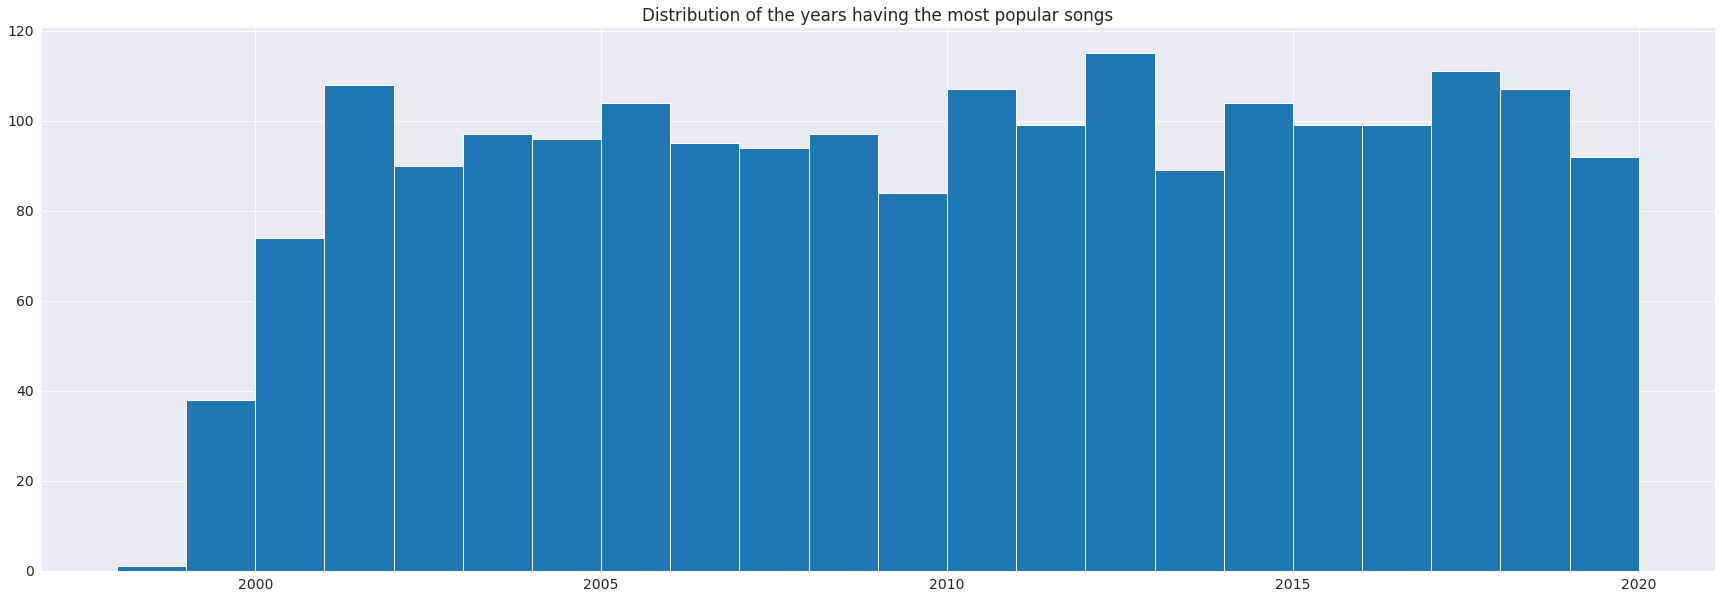

In [80]:
year=range(1998,2021)
plt.title("Distribution of the years having the most popular songs")
plt.hist(songs_df.year,bins=year);

### Finding out the genres which have most songs in the top 20 most popular songs.

In [81]:
top_20_songs=songs_df.sort_values(by="popularity",ascending=False).head(20)
top_20_songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1709,Ed Sheeran,Perfect,263400,False,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop


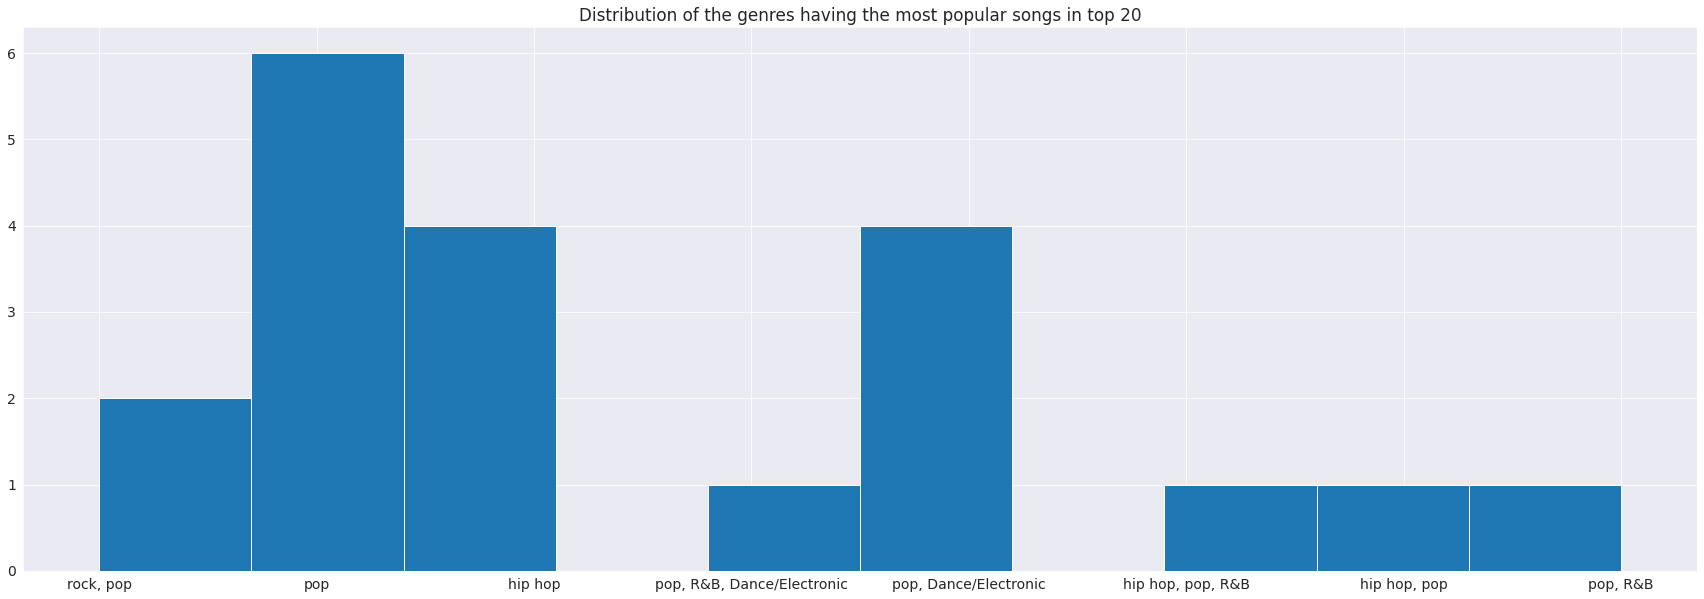

In [82]:
plt.title("Distribution of the genres having the most popular songs in top 20")
plt.hist(top_20_songs.genre);

###  Finding out the top ten genres based on the songs in the top 2000.

In [83]:
genre_df=songs_df.groupby("genre").count().reset_index()
genre_df=genre_df.drop(genre_df.columns[2:],axis=1).head(10)
genre_df

,genre,artist
0,Dance/Electronic,41
1,"Folk/Acoustic, pop",2
2,"Folk/Acoustic, rock",1
3,"Folk/Acoustic, rock, pop",1
4,R&B,13
5,"World/Traditional, Folk/Acoustic",1
6,"World/Traditional, hip hop",2
7,"World/Traditional, pop",1
8,"World/Traditional, pop, Folk/Acoustic",2
9,"World/Traditional, rock",2


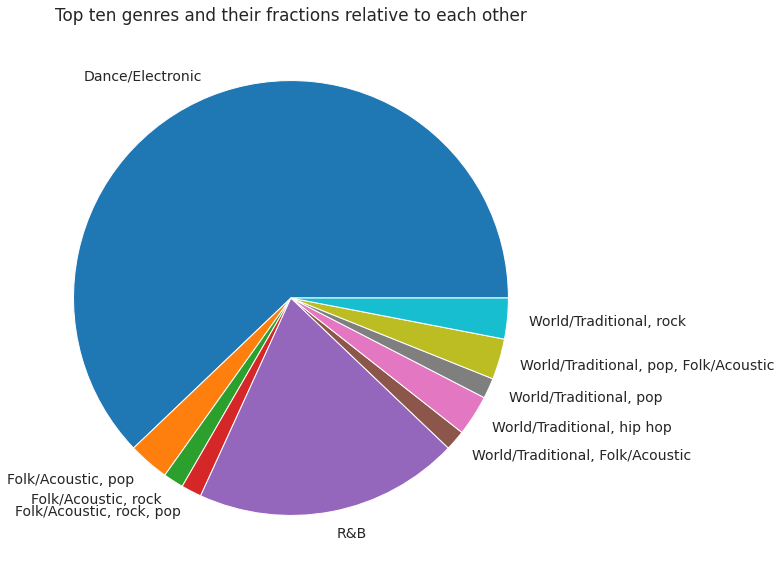

In [84]:
plt.title("Top ten genres and their fractions relative to each other")
plt.pie(genre_df.artist,labels=genre_df.genre);

### Finding out trends in average duartion of songs in milliseconds with respect to the year of their year of release.

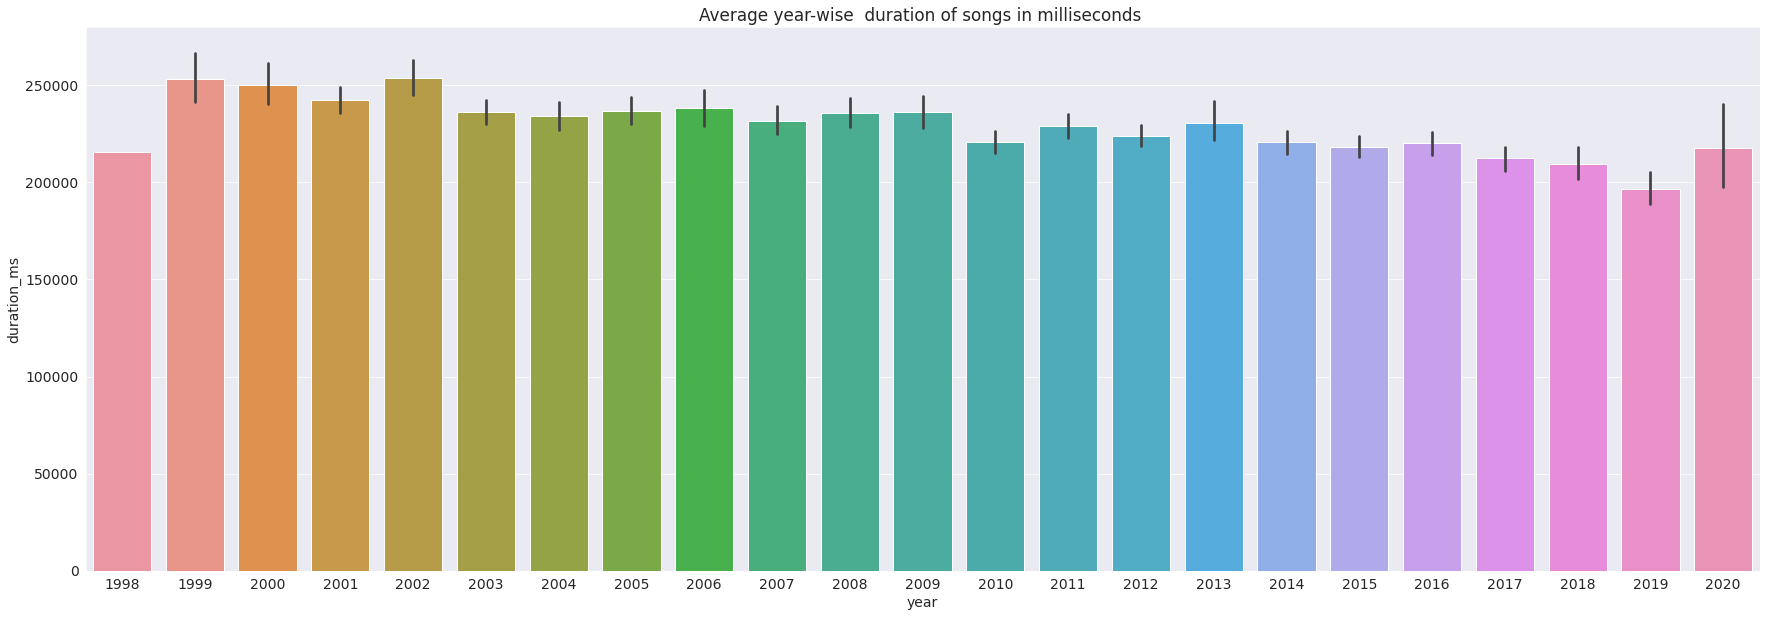

In [85]:
plt.title("Average year-wise  duration of songs in milliseconds ")
sns.barplot(x='year', y='duration_ms', data=songs_df);

### Checking for explicity.

In [86]:
explicit_df=songs_df.groupby("explicit").count().reset_index()

In [87]:
explicit_df=explicit_df.drop(explicit_df.columns[3:],axis=1).drop("artist",axis=1)
explicit_df

,explicit,song
0,False,1449
1,True,551


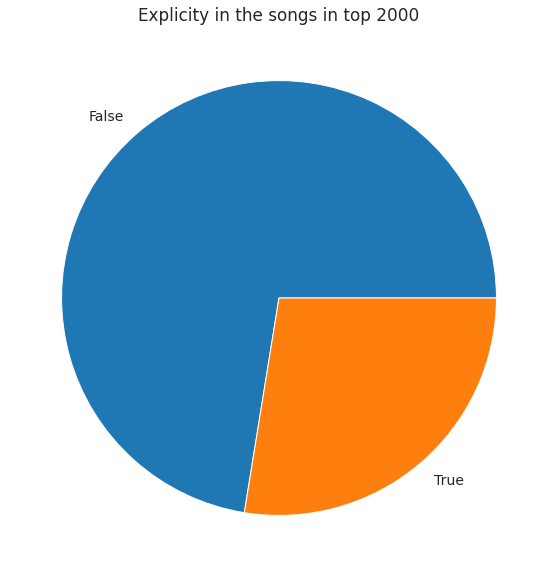

In [88]:
plt.pie(explicit_df.song,labels=explicit_df.explicit);
plt.title("Explicity in the songs in top 2000");

In [89]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'

Let us save and upload our work to Jovian before continuing

In [90]:
import jovian

In [91]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'

## Asking and Answering Questions

TODO - Now that we have already seen some trends, let us try and find out some interesting questions about this dataset. 



#### Q1: TODO - What is the longest song amongst the top 2000 songs?

In [92]:
songs_df.sort_values("duration_ms").tail(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1381,Justin Timberlake,Mirrors,484146,False,2013,78,0.574,0.512,5,-6.664,0,0.0503,0.234,0.0,0.0946,0.512,76.899,pop


#### The longest song is Mirrors	by Justin Timberlake.

#### Q2 : TODO- What is the shortest song among the top 2000 songs availabe in the database?

In [93]:
songs_df.sort_values("duration_ms").head(1)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1931,Lil Nas X,Old Town Road,113000,False,2019,76,0.907,0.53,1,-6.112,1,0.127,0.0578,0.000002,0.101,0.507,135.998,"hip hop, pop"


#### The shortest song is Old Town Road	by Lil Nas X.

#### Q3: TODO - Is there any correlation between the acousticness of a song and its popularity?

In [94]:
songs_df.sort_values(by="acousticness",ascending=False)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
496,Gary Jules,Mad World (Feat. Michael Andrews),189506,False,2001,65,0.345,0.0581,3,-17.217,1,0.0374,0.976000,0.000366,0.1030,0.304,174.117,pop
459,Britney Spears,Everytime,230306,False,2003,63,0.398,0.2840,3,-12.852,1,0.0337,0.966000,0.000086,0.1160,0.114,109.599,pop
680,James Blunt,Goodbye My Lover,258653,False,2005,67,0.432,0.2610,4,-12.591,1,0.0512,0.953000,0.003420,0.0903,0.273,89.567,pop
1396,Rihanna,Stay,240706,False,2012,76,0.621,0.3100,9,-10.164,0,0.0283,0.945000,0.000061,0.1170,0.125,111.893,"hip hop, pop, R&B"
1929,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.2960,4,-10.109,0,0.0333,0.934000,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,Kesha,Take It Off,215200,False,2010,68,0.729,0.6750,5,-5.292,0,0.0286,0.000041,0.001260,0.0867,0.740,125.036,"pop, Dance/Electronic"
683,Keane,Is It Any Wonder?,186173,False,2006,59,0.489,0.9550,11,-2.771,0,0.0363,0.000038,0.000178,0.3340,0.816,129.352,pop
472,Green Day,American Idiot,176346,True,2004,77,0.380,0.9880,1,-2.042,1,0.0639,0.000026,0.000079,0.3680,0.769,186.113,rock
427,Spiderbait,Black Betty - Edit,205973,False,2004,63,0.562,0.8650,7,-6.476,0,0.0922,0.000021,0.591000,0.2190,0.350,124.047,rock


<AxesSubplot:xlabel='acousticness', ylabel='popularity'>

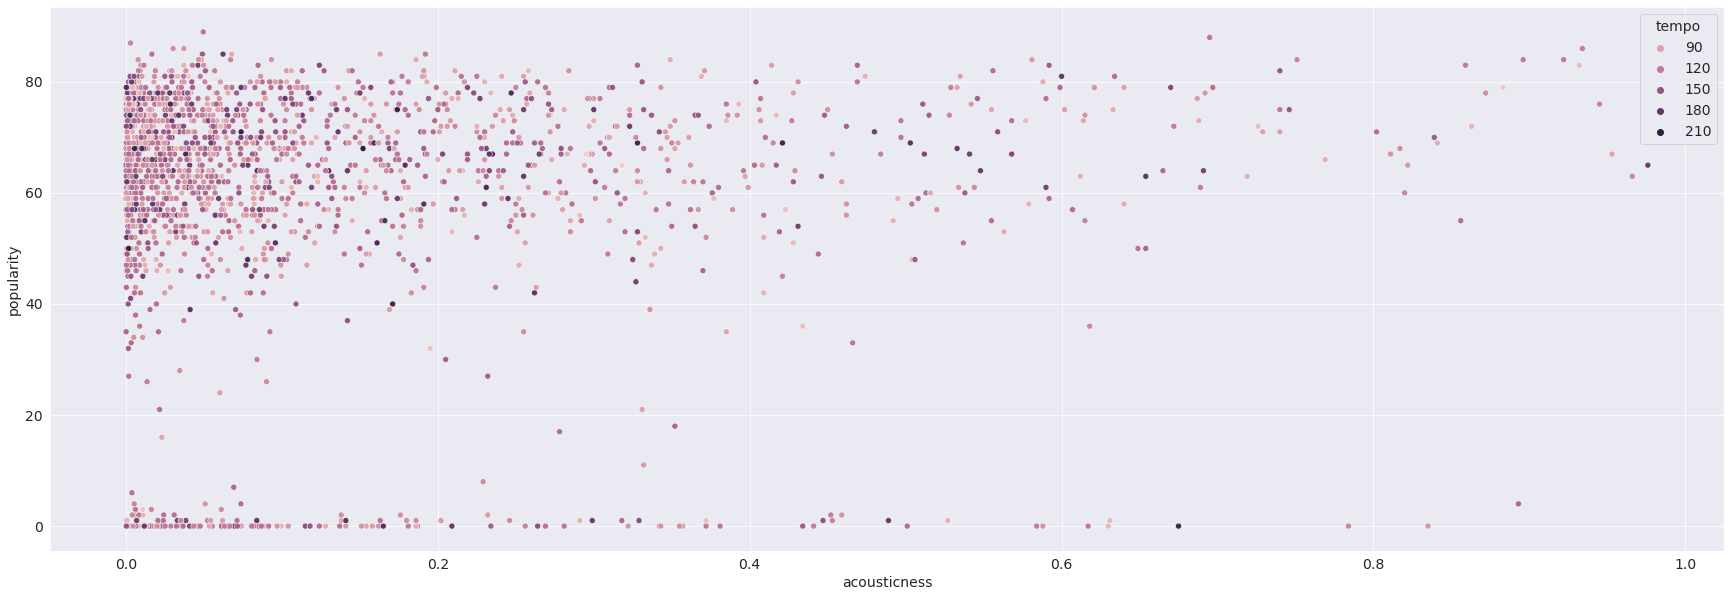

In [95]:
sns.scatterplot(y=songs_df.popularity,x=songs_df.acousticness,hue=songs_df.tempo)

#### There are many songs with low acousticness and tempo ranging from 120-150 and most of these songs are overwhelmingly popular.
#### This is proved by the concentration of dots in  the left hand side of the graph.

In [96]:
songs_df.acousticness.mean()

0.12895492795000016

#### Q4: TODO - What correlation exists between loudness of a song and its popularity?

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

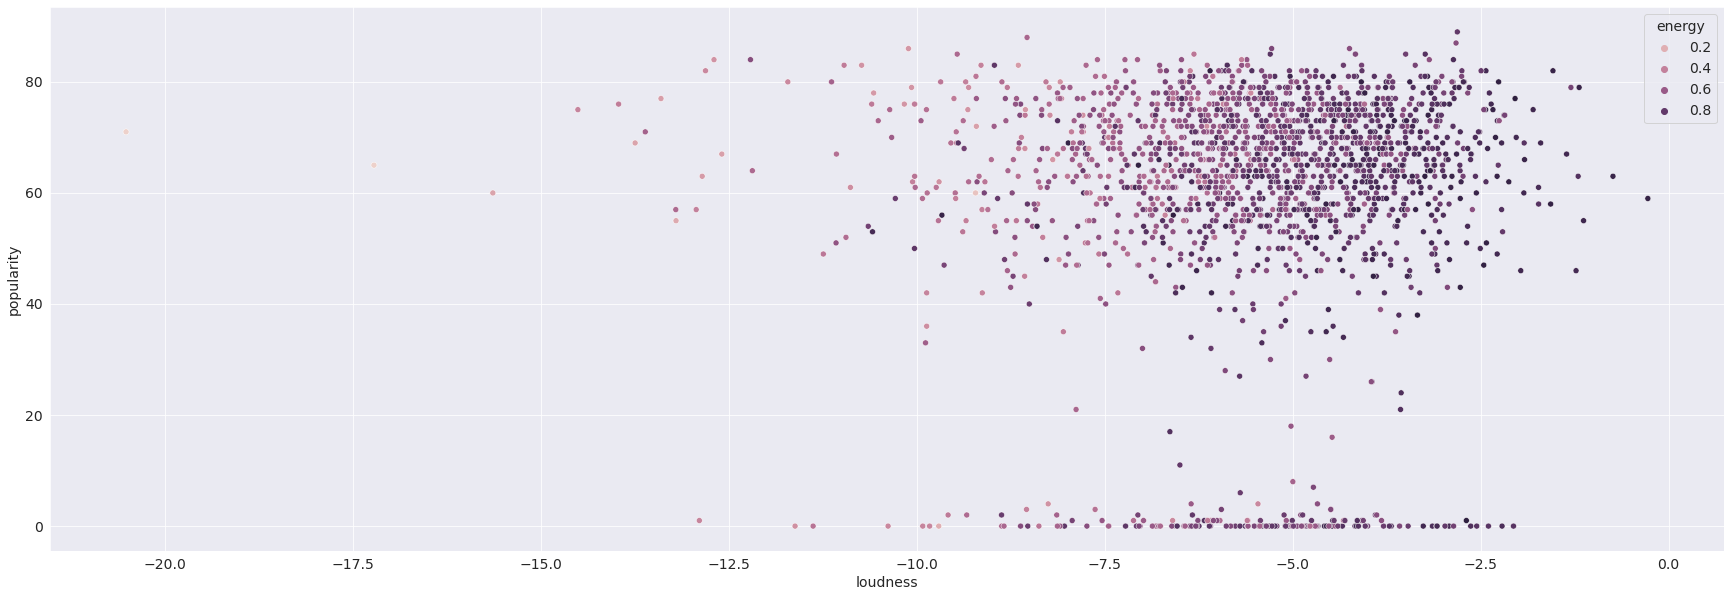

In [97]:
sns.scatterplot(y=songs_df.popularity,x=songs_df.loudness,hue=songs_df.energy)

#### Songs with more loudness are more popular with a few exceptions as one would expect.There are hardly a few songs among the top 2000 which have a low loudness.Most of the songs have an energy in the range of 0.6-0.8.

In [98]:
songs_df.loudness.mean()

-5.512434500000003

#### Q5: TODO  Correlation between popularity of the songs and their duration

<AxesSubplot:xlabel='duration_ms', ylabel='popularity'>

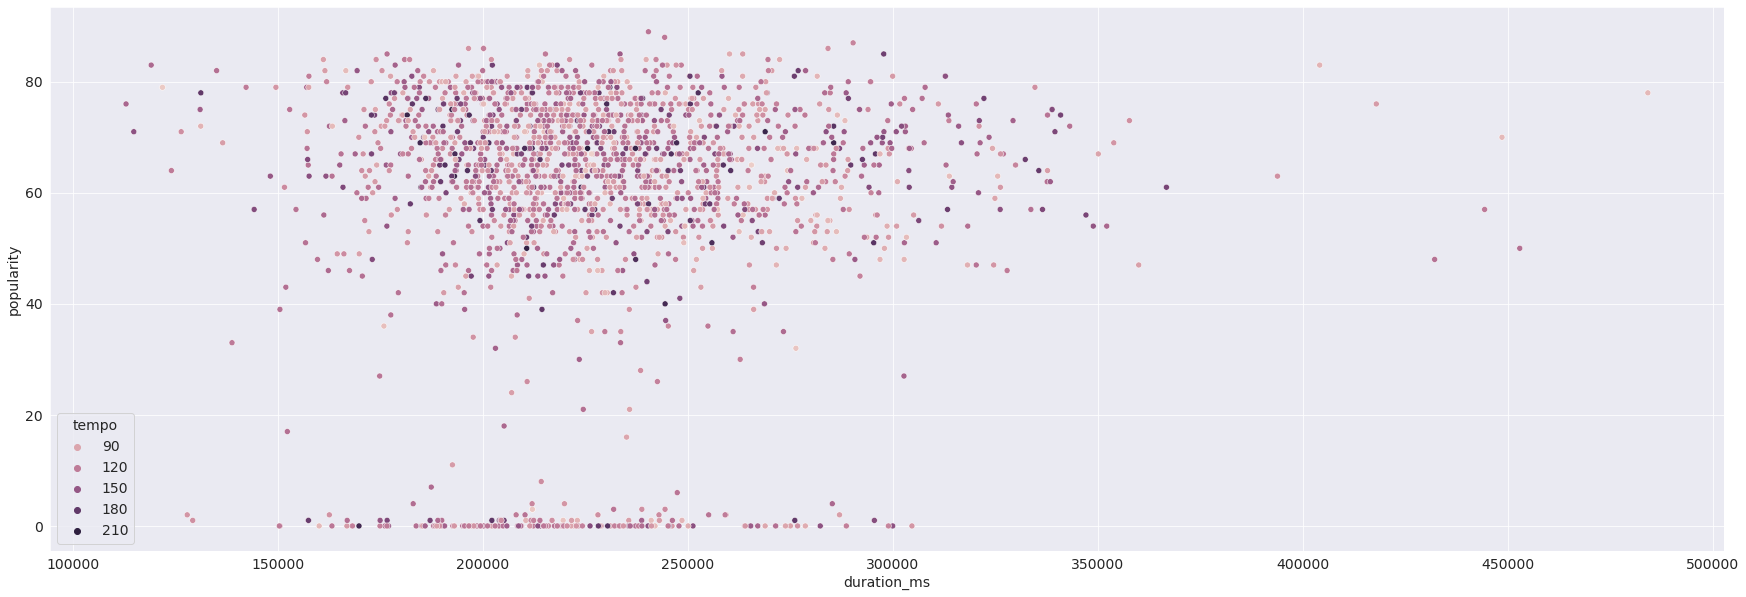

In [99]:
sns.scatterplot(y=songs_df.popularity,x=songs_df.duration_ms,hue=songs_df.tempo)

#### Songs with larger and smaller durations are hardly popular. Most of the dots are concentrated on the middle of the duration axis.

In [100]:
songs_df.duration_ms.mean()

228748.1245

Let us save and upload our work to Jovian before continuing.

In [101]:
import jovian

In [102]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'

## Inferences
We can see the variation of different factors associated with songs and their corresponding influence on the songs' popularity. The songs included in this dataset are the top 2000 of all the songs users have been found to be listening to in the span of the decade 2009-2019. We can see further variation amongst these 2000 songs as processed in the code above. We can draw a few particular inferences  from the analysis done in thin notebook. Some of them are:

1) A large volume of songs in the top 2000 have an average duration.This basically implies that the songs with relatively long and short durations are seldom popular.

2) Songs with more loudness are more popular, with a few exceptions as one would expect.There are hardly a few songs among the top 2000 which have a low loudness. Most of the songs have an energy in the range of 0.6-0.8.

3) Most of the songs in top 2000 have low acousticness and tempo ranging from 120-150 and most of these songs are overwhelmingly popular. This is proved by the concentration of dots in  the left hand side of the scatterplot which correlates acousticness of a song to its popularity.

4) Majority of the songs in the top 2000 are not explicit, implying that they can be listened to by all age groups. Perhaps that large base of listeners have a significant effect on their popularity.

5) 2012 was an amazing year for songs. It boasts the most number of songs in the top 2000. 

## Conclusion
All in all, I'd say that the trends of the different characteristics of sounds are really well set and it's really intriguing to see how all of it falls into place.

In [103]:
import jovian

In [104]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'

## References and Future Work

Further analysis of this dataset is possible, with the objectives of finding trends of all the underlying factors with popularity. If possible, I'd also like to expand this dataset so as to cover atleast the last 4 decades and work on them in a similar fashion. I got a dreat deal of help by looking at "Analyzing Spotify’s Top Tracks Of 2017 Using Data Visualization" done by Ashrith (https://towardsdatascience.com/what-makes-a-song-likeable-dbfdb7abe404)

In [107]:
import jovian

In [109]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019


'https://jovian.ai/reiuizadyu8/eda-on-the-most-popular-songs-on-spotify-from-2009-to-2019'